# Project Title : -- Auto Price Prediction

#  Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.



In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('auto_imports.csv',names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rmp', 'city_mpg', 'highway_mpg', 'price'], na_values = "?")
data.head(60)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rmp,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430


# Handling missing values

In [3]:
#dropping the coloumn which is having more missing values since this feature is seemes to be irrelevant too.

data.drop('normalized_losses' , axis = 1, inplace = True)
data.head(60)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rmp,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875
9,2,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430


In [4]:
count  =  data.isnull().sum()
count[count>0]

num_of_doors    2
bore            4
stroke          4
horsepower      2
peak_rmp        2
dtype: int64

In [5]:
data.dropna(axis  =0)

count  =  data.isnull().sum()
count[count>0]


num_of_doors    2
bore            4
stroke          4
horsepower      2
peak_rmp        2
dtype: int64

In [6]:
# Replacing "?" in the dataset to NaN
data.replace("?", np.NaN, inplace = True)
data.head(60)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rmp,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710
7,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920
8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875
9,2,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430


In [7]:
# Filling the missing value with mean for horsepower and peak_rpm, assuming that will not negatively affect the efficiency.

from sklearn.impute import SimpleImputer

# imputing mean in 'horsepower'
impute  =  SimpleImputer(strategy='mean')  
data['horsepower'] =  impute.fit_transform(data['horsepower'].values.reshape(-1,1))

# imputing mean in 'peak rpm'
impute  =  SimpleImputer(strategy='mean')  
data['peak_rmp'] =  impute.fit_transform(data['peak_rmp'].values.reshape(-1,1))


count  =  data.isnull().sum()
count[count>0]

num_of_doors    2
bore            4
stroke          4
dtype: int64

In [8]:
# Encoding string value to numerical value.

dict_buy = {
    'two': 2,
    'four': 4,
    }
data.num_of_doors = data.num_of_doors.map(dict_buy)

In [9]:
data.fillna(method='ffill').head(60)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rmp,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495
1,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500
2,1,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500
3,2,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950
4,2,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450
5,2,audi,gas,std,2.0,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250
6,1,audi,gas,std,4.0,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710
7,1,audi,gas,std,4.0,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920
8,1,audi,gas,turbo,4.0,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875
9,2,bmw,gas,std,2.0,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430


In [10]:
data['bore'] = data['bore'].fillna(data['bore'].mean())
data['num_of_doors'] = data['num_of_doors'].fillna(data['num_of_doors'].mean())
data['stroke'] = data['stroke'].fillna(data['stroke'].mean())

count  =  data.isnull().sum()
count[count>0]

Series([], dtype: int64)

In [11]:
data.shape

(201, 25)

# EDA Part

In [12]:
data.describe()

,symboling,num_of_doors,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rmp,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,3.135678,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,0.988273,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    object 
 2   fuel_type          201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num_of_doors       201 non-null    float64
 5   body_style         201 non-null    object 
 6   drive_wheels       201 non-null    object 
 7   engine_location    201 non-null    object 
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    object 
 14  num_of_cylinders   201 non-null    object 
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

In [14]:
for col in ['symboling','make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rmp', 'city_mpg', 'highway_mpg', 'price']:
    print(col,len(data[col].unique()))
    print('*'*15)

symboling 6
***************
make 22
***************
fuel_type 2
***************
aspiration 2
***************
num_of_doors 3
***************
body_style 5
***************
drive_wheels 3
***************
engine_location 2
***************
wheel_base 52
***************
length 73
***************
width 43
***************
height 49
***************
curb_weight 169
***************
engine_type 6
***************
num_of_cylinders 7
***************
engine_size 43
***************
fuel_system 8
***************
bore 39
***************
stroke 37
***************
compression_ratio 32
***************
horsepower 59
***************
peak_rmp 23
***************
city_mpg 29
***************
highway_mpg 30
***************
price 186
***************


# Data visualization

### Finding the outliers

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

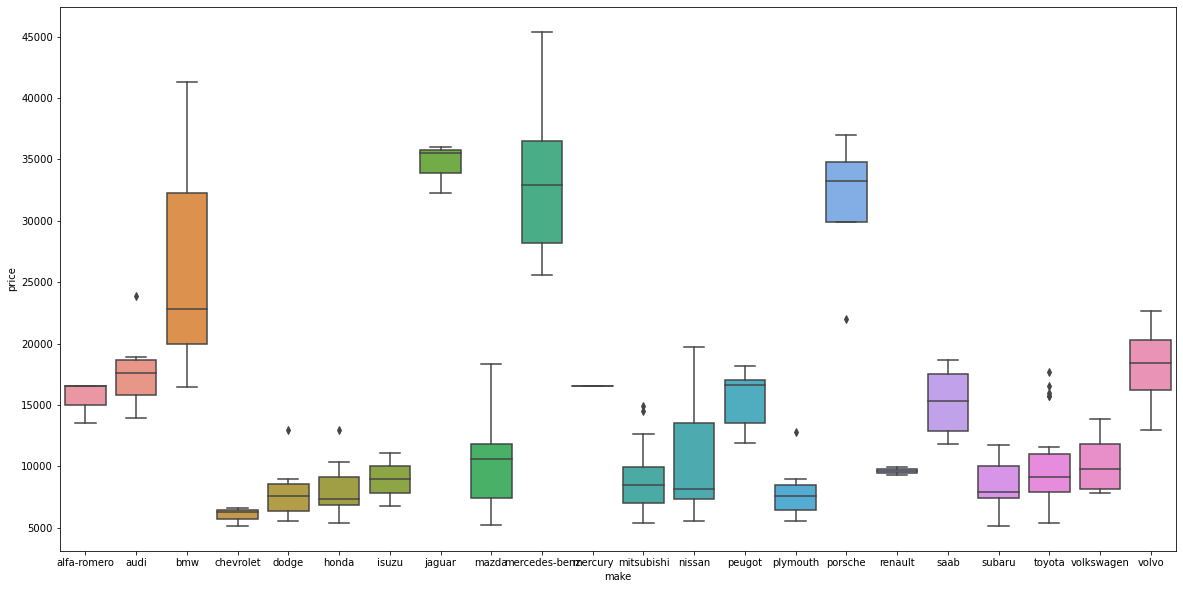

In [16]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(x='make', y='price', data=data)

### This graph shows whichever companies producing luxury cars and other category cars.

C:\Users\ROSELINE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

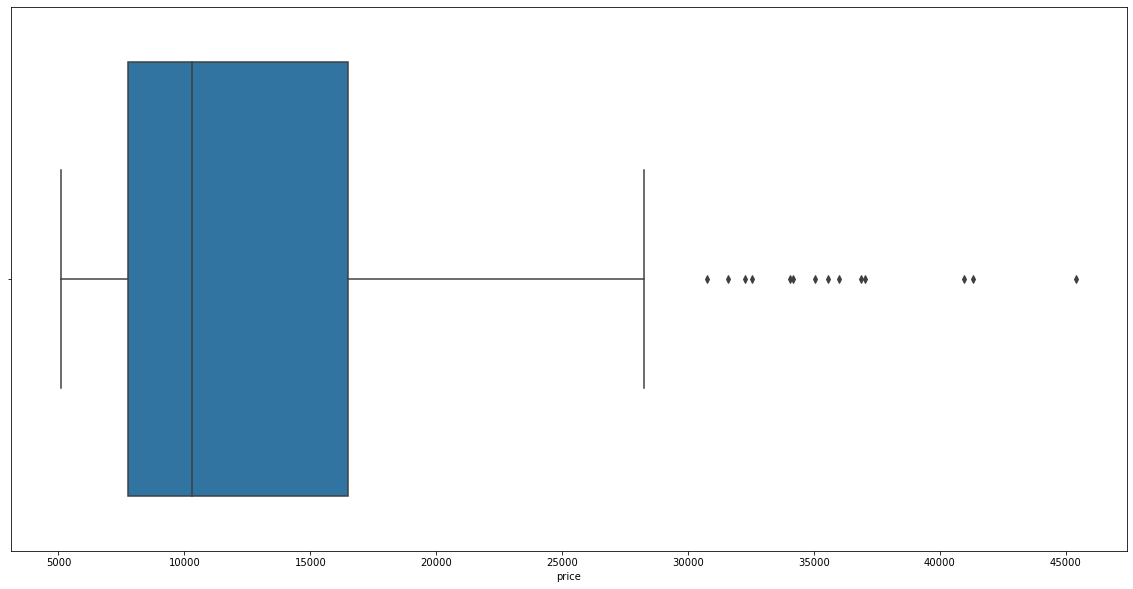

In [17]:
sns.boxplot(data.price)

### since the price continuous from 5118 to 45400, the values which seem to be outlier in the above graph is not an outlier.

<AxesSubplot:xlabel='make', ylabel='count'>

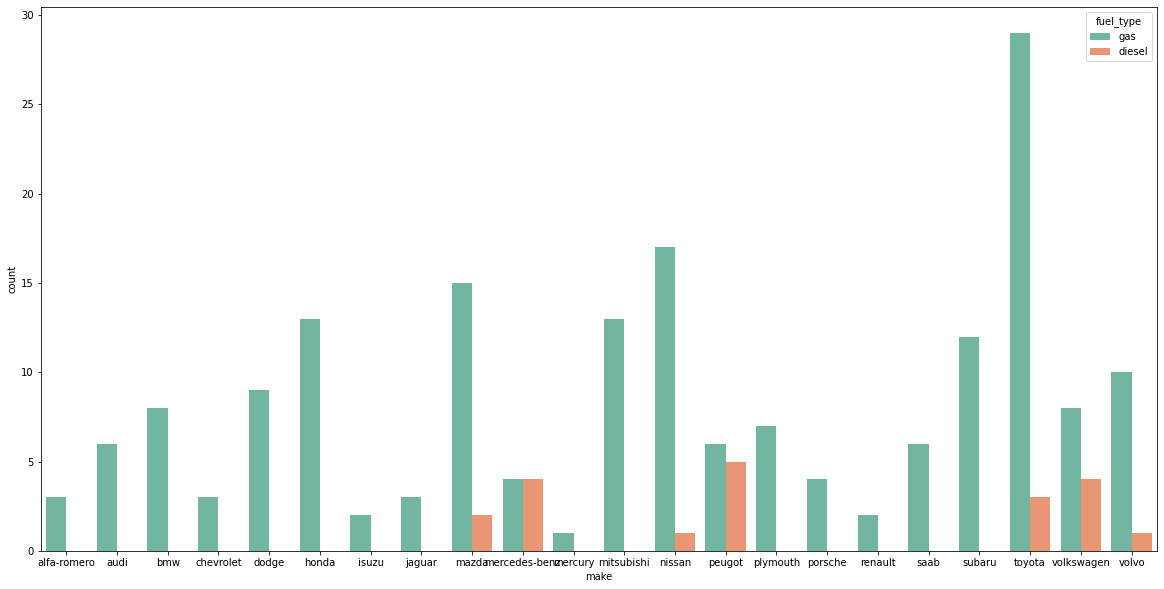

In [18]:
sns.countplot( x = 'make' ,hue = 'fuel_type' ,data = data,palette= 'Set2')

### Most of the vehicles are usinf gas as fuel, Toyota being highest among the car companies.

In [19]:
def countplot(label, data):
  plt.figure(figsize=(20,10))
  ax=sns.countplot(x=label,data=data,palette = "Set2")
  ax.set_title(f"Distribution of feature {label.upper()}", fontsize=22,pad=10)
  plt.show()

In [20]:
def countplotwithprice(label, data):
  plt.figure(figsize=(14,5))
  ax=sns.countplot(x=label,data=data,hue=data.price)
  ax.set_title(f"Distribution of feature {label.upper()} wrt to target class PRICE", fontsize=22,pad=10)
  plt.show()

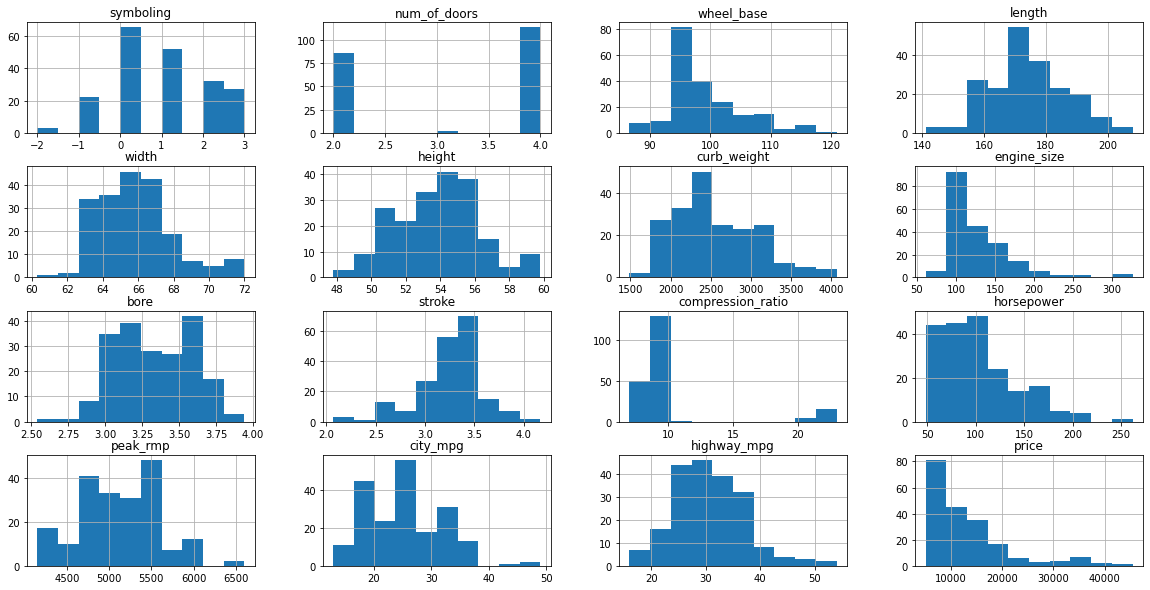

In [21]:
data.hist()
plt.show()

### Horse power, wheel base, price, engine size showes positively skewed normal distribution and stroke showes negatively skewed normal distribution.

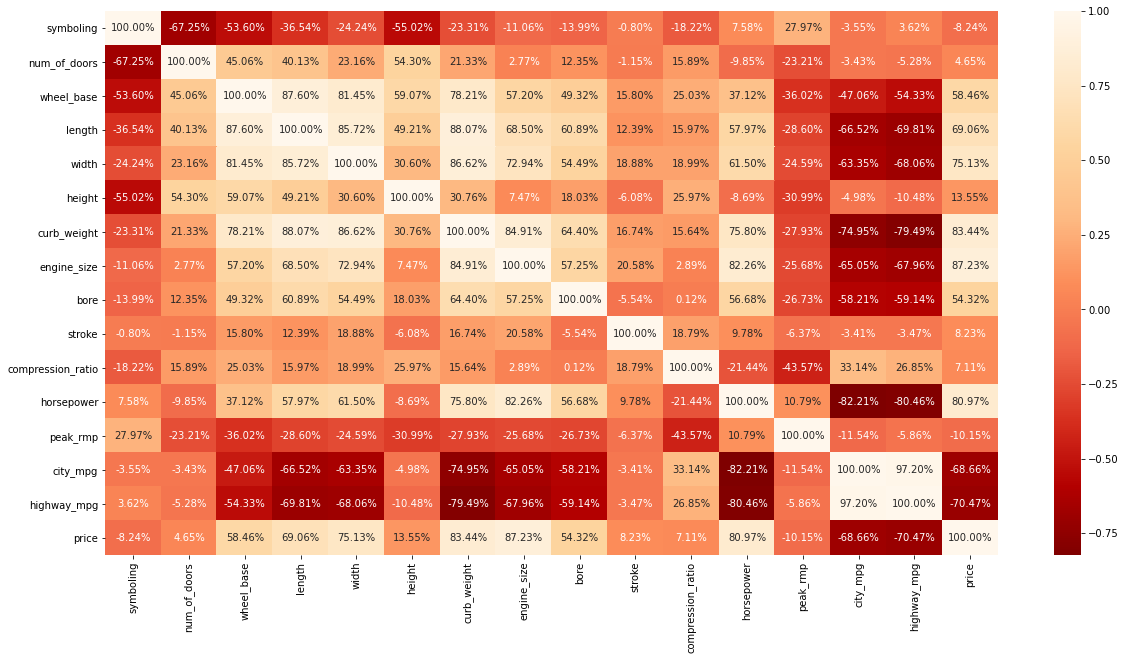

In [22]:
plt.figure(figsize=(20,10))
ax=sns.heatmap(data.corr(),annot=True,fmt='.2%', cmap='OrRd_r')

### We can drop highway_mpg since its having high correlation with city_mpg

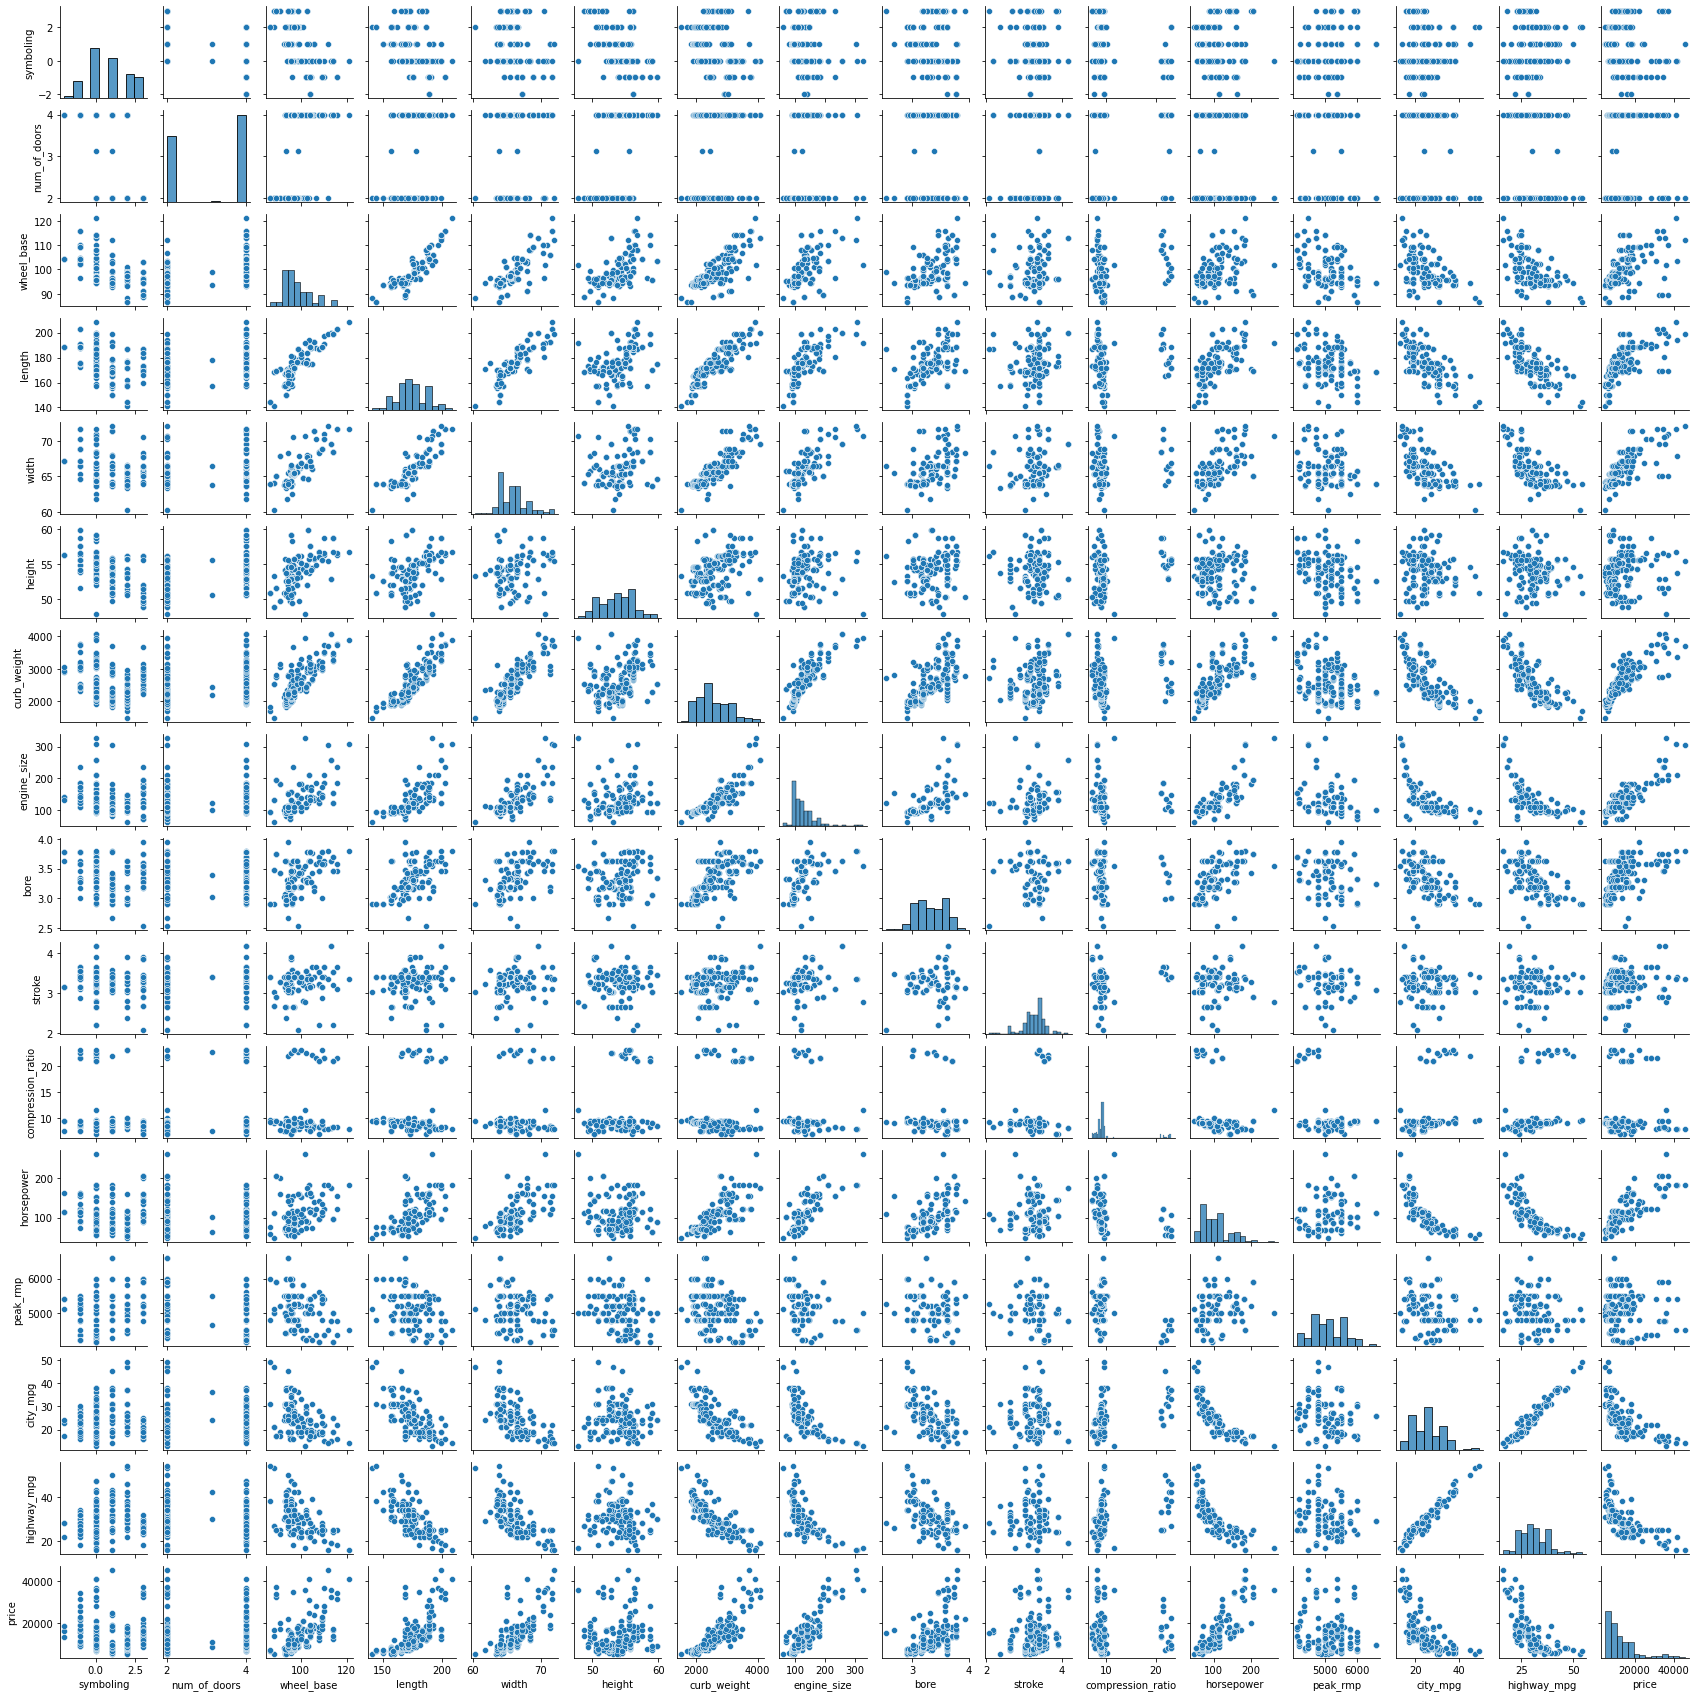

In [108]:
sns.pairplot(data, height=1.5)

# Data Wrangling ....

In [23]:
data.isnull()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rmp,city_mpg,highway_mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
data.isnull().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rmp             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [25]:
data.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rmp,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [26]:
data.dropna(inplace=True)

<AxesSubplot:>

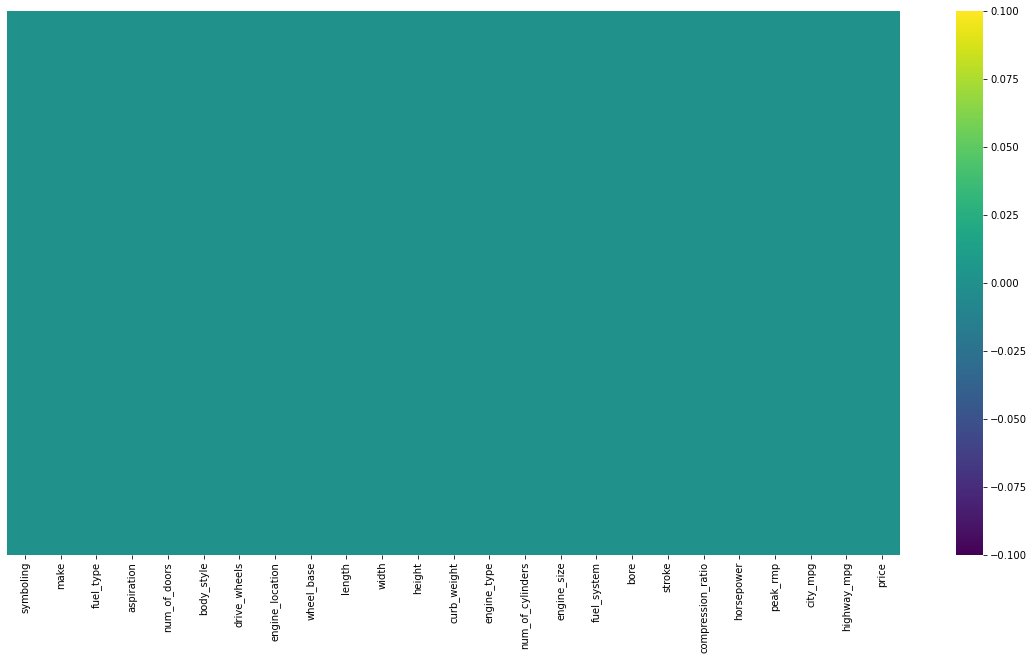

In [27]:
sns.heatmap(data.isnull() , yticklabels=False , cmap= 'viridis')

In [28]:
pd.get_dummies(data['fuel_type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [29]:
fuel = pd.get_dummies(data['fuel_type'],drop_first= True)
fuel.head()

,gas
0,1
1,1
2,1
3,1
4,1


In [30]:
aspi = pd.get_dummies(data['aspiration'],drop_first= True)
aspi.head()

,turbo
0,0
1,0
2,0
3,0
4,0


In [31]:
doors = pd.get_dummies(data['num_of_doors'],drop_first= True)
doors.head()

,3.135678,4.000000
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1


In [32]:
wheels = pd.get_dummies(data['drive_wheels'],drop_first= True)
wheels

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0
...,...,...
196,0,1
197,0,1
198,0,1
199,0,1


In [33]:
engine = pd.get_dummies(data['engine_location'],drop_first= True)
engine

,rear
0,0
1,0
2,0
3,0
4,0
...,...
196,0
197,0
198,0
199,0


In [34]:
data1 = pd.concat([data,fuel,aspi,doors,wheels,engine], axis = 1)
data1.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,city_mpg,highway_mpg,price,gas,turbo,3.135678391959799,4.0,fwd,rwd,rear
0,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,21,27,13495,1,0,0,0,0,1,0
1,3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,...,21,27,16500,1,0,0,0,0,1,0
2,1,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,19,26,16500,1,0,0,0,0,1,0
3,2,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,24,30,13950,1,0,0,1,1,0,0
4,2,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,18,22,17450,1,0,0,1,0,0,0


In [35]:
data2 = data1.drop(['fuel_type','aspiration','num_of_doors','drive_wheels','engine_location','curb_weight','highway_mpg','engine_size','engine_type'],axis = 1)
data2.head()

,symboling,make,body_style,wheel_base,length,width,height,num_of_cylinders,fuel_system,bore,...,peak_rmp,city_mpg,price,gas,turbo,3.135678391959799,4.0,fwd,rwd,rear
0,3,alfa-romero,convertible,88.6,168.8,64.1,48.8,four,mpfi,3.47,...,5000.0,21,13495,1,0,0,0,0,1,0
1,3,alfa-romero,convertible,88.6,168.8,64.1,48.8,four,mpfi,3.47,...,5000.0,21,16500,1,0,0,0,0,1,0
2,1,alfa-romero,hatchback,94.5,171.2,65.5,52.4,six,mpfi,2.68,...,5000.0,19,16500,1,0,0,0,0,1,0
3,2,audi,sedan,99.8,176.6,66.2,54.3,four,mpfi,3.19,...,5500.0,24,13950,1,0,0,1,1,0,0
4,2,audi,sedan,99.4,176.6,66.4,54.3,five,mpfi,3.19,...,5500.0,18,17450,1,0,0,1,0,0,0


# Training Data ....

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in data2.columns:
    data2[column] = le.fit_transform(data2[column])

In [37]:
X = data2.drop('price', axis =1)
y = data2['price']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=20)

In [40]:
X_train.head()

,symboling,make,body_style,wheel_base,length,width,height,num_of_cylinders,fuel_system,bore,...,horsepower,peak_rmp,city_mpg,gas,turbo,3.135678391959799,4.0,fwd,rwd,rear
112,2,13,3,43,58,32,43,2,5,23,...,24,10,6,1,0,0,1,0,1,0
159,3,19,3,10,21,7,15,2,1,13,...,10,8,16,1,0,0,0,0,1,0
85,1,11,3,17,32,15,11,2,6,12,...,35,17,10,1,0,0,1,1,0,0
116,3,14,2,8,6,5,8,2,6,7,...,27,17,11,1,1,0,0,1,0,0
45,2,7,3,48,70,35,16,3,5,32,...,53,7,2,1,0,0,1,0,1,0


In [41]:
X_test.head()

,symboling,make,body_style,wheel_base,length,width,height,num_of_cylinders,fuel_system,bore,...,horsepower,peak_rmp,city_mpg,gas,turbo,3.135678391959799,4.0,fwd,rwd,rear
117,3,14,2,8,6,5,7,2,1,4,...,8,17,18,1,0,0,1,1,0,0
80,5,11,2,14,35,22,5,2,6,28,...,44,10,6,1,1,0,0,1,0,0
198,1,21,3,45,61,34,34,3,5,27,...,39,17,5,1,0,0,1,0,1,0
44,2,7,3,48,70,35,16,3,5,32,...,53,7,2,1,0,0,1,0,1,0
108,2,13,3,43,58,32,43,2,5,23,...,23,10,6,1,0,0,1,0,1,0


In [42]:
y_train.head()

112    140
159     54
85      72
116     49
45     179
Name: price, dtype: int64

In [43]:
y_test.head()

117     10
80     125
198    163
44     174
108    129
Name: price, dtype: int64

In [44]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   symboling          201 non-null    int64
 1   make               201 non-null    int32
 2   body_style         201 non-null    int32
 3   wheel_base         201 non-null    int64
 4   length             201 non-null    int64
 5   width              201 non-null    int64
 6   height             201 non-null    int64
 7   num_of_cylinders   201 non-null    int32
 8   fuel_system        201 non-null    int32
 9   bore               201 non-null    int64
 10  stroke             201 non-null    int64
 11  compression_ratio  201 non-null    int64
 12  horsepower         201 non-null    int64
 13  peak_rmp           201 non-null    int64
 14  city_mpg           201 non-null    int64
 15  price              201 non-null    int64
 16  gas                201 non-null    int64
 17  turbo           

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,mean_squared_error,mean_absolute_error

In [46]:
lr_model  = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
r2_score(y_pred,y_test)

0.8652226046567963

In [47]:
accuracy = lr_model.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.8809014398231033


In [48]:
mean_squared_error(y_pred,y_test)

342.85431596112977

In [49]:
mean_absolute_error(y_pred,y_test)

14.205596824427108

In [50]:
m = lr_model.coef_
m

array([  0.94492245,  -0.806753  ,  -5.43859316,   0.16009616,
         0.64771157,   0.64975319,   0.18020723,   0.57852157,
         2.59195162,  -0.38516954,  -0.50200335,   0.81120317,
         1.21846552,   0.12035325,  -2.24146089, -21.52088821,
         2.92726387,   6.10896428,   2.68648574,  -8.91818629,
        -3.75985605,  26.94702188])

In [51]:
c = lr_model.intercept_
c

84.42162524167091

In [52]:
X

,symboling,make,body_style,wheel_base,length,width,height,num_of_cylinders,fuel_system,bore,...,horsepower,peak_rmp,city_mpg,gas,turbo,3.135678391959799,4.0,fwd,rwd,rear
0,5,0,0,2,22,8,1,2,5,24,...,31,10,8,1,0,0,0,0,1,0
1,5,0,0,2,22,8,1,2,5,24,...,31,10,8,1,0,0,0,0,1,0
2,3,0,2,10,29,16,13,3,5,1,...,46,10,6,1,0,0,0,0,1,0
3,4,1,3,29,44,21,25,2,5,13,...,27,17,11,1,0,0,1,1,0,0
4,4,1,3,28,44,23,25,1,5,13,...,34,17,5,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,3,45,61,34,34,2,5,36,...,33,16,10,1,0,0,1,0,1,0
197,1,21,3,45,61,33,34,2,5,36,...,49,15,6,1,1,0,1,0,1,0
198,1,21,3,45,61,34,34,3,5,27,...,39,17,5,1,0,0,1,0,1,0
199,1,21,3,45,61,34,34,3,3,6,...,29,8,13,0,1,0,1,0,1,0


In [53]:
yhat = m * X + c
yhat

,symboling,make,body_style,wheel_base,length,width,height,num_of_cylinders,fuel_system,bore,...,horsepower,peak_rmp,city_mpg,gas,turbo,3.135678391959799,4.0,fwd,rwd,rear
0,89.146237,84.421625,84.421625,84.741818,98.671280,89.619651,84.601832,85.578668,97.381383,75.177556,...,122.194056,85.625158,66.489938,62.900737,84.421625,84.421625,84.421625,84.421625,80.661769,84.421625
1,89.146237,84.421625,84.421625,84.741818,98.671280,89.619651,84.601832,85.578668,97.381383,75.177556,...,122.194056,85.625158,66.489938,62.900737,84.421625,84.421625,84.421625,84.421625,80.661769,84.421625
2,87.256393,84.421625,73.544439,86.022587,103.205261,94.817676,86.764319,86.157190,97.381383,84.036456,...,140.471039,85.625158,70.972860,62.900737,84.421625,84.421625,84.421625,84.421625,80.661769,84.421625
3,88.201315,83.614872,68.105846,89.064414,112.920934,98.066442,88.926806,85.578668,97.381383,79.414421,...,117.320194,86.467631,59.765555,62.900737,84.421625,84.421625,87.108111,75.503439,84.421625,84.421625
4,88.201315,83.614872,68.105846,88.904318,112.920934,99.365949,88.926806,85.000147,97.381383,79.414421,...,125.849453,86.467631,73.214321,62.900737,84.421625,84.421625,87.108111,84.421625,84.421625,84.421625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,85.366548,67.479812,68.105846,91.625953,123.932031,106.513234,90.548671,85.578668,97.381383,70.555522,...,124.630987,86.347277,62.007016,62.900737,84.421625,84.421625,87.108111,84.421625,80.661769,84.421625
197,85.366548,67.479812,68.105846,91.625953,123.932031,105.863481,90.548671,85.578668,97.381383,70.555522,...,144.126436,86.226924,70.972860,62.900737,87.348889,84.421625,87.108111,84.421625,80.661769,84.421625
198,85.366548,67.479812,68.105846,91.625953,123.932031,106.513234,90.548671,86.157190,97.381383,74.022048,...,131.941780,86.467631,73.214321,62.900737,84.421625,84.421625,87.108111,84.421625,80.661769,84.421625
199,85.366548,67.479812,68.105846,91.625953,123.932031,106.513234,90.548671,86.157190,92.197480,82.110608,...,119.757125,85.384451,55.282634,84.421625,87.348889,84.421625,87.108111,84.421625,80.661769,84.421625


In [54]:
yhat_train = m * X_train + c
yhat_train

,symboling,make,body_style,wheel_base,length,width,height,num_of_cylinders,fuel_system,bore,...,horsepower,peak_rmp,city_mpg,gas,turbo,3.135678391959799,4.0,fwd,rwd,rear
112,86.311470,73.933836,68.105846,91.305760,121.988896,105.213727,92.170536,85.578668,97.381383,75.562726,...,113.664798,85.625158,70.972860,62.900737,84.421625,84.421625,87.108111,84.421625,80.661769,84.421625
159,87.256393,69.093318,68.105846,86.022587,98.023568,88.969898,87.124734,85.578668,87.013577,79.414421,...,96.606280,85.384451,48.558251,62.900737,84.421625,84.421625,84.421625,84.421625,80.661769,84.421625
85,85.366548,75.547342,68.105846,87.143260,105.148395,94.167923,86.403905,85.578668,99.973335,79.799591,...,127.067918,86.467631,62.007016,62.900737,84.421625,84.421625,87.108111,75.503439,84.421625,84.421625
116,87.256393,73.127083,73.544439,85.702395,88.307895,87.670391,85.863283,85.578668,99.973335,81.725438,...,117.320194,86.467631,59.765555,62.900737,87.348889,84.421625,84.421625,75.503439,84.421625,84.421625
45,86.311470,78.774354,68.105846,92.106241,129.761435,107.162987,87.304941,86.157190,97.381383,72.096200,...,149.000298,85.264098,79.938703,62.900737,84.421625,84.421625,87.108111,84.421625,80.661769,84.421625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,87.256393,69.093318,73.544439,86.502875,89.603318,87.020638,89.287220,85.578668,87.013577,81.340269,...,91.732418,85.384451,44.075329,62.900737,84.421625,84.421625,87.108111,75.503439,84.421625,84.421625
137,86.311470,69.900071,68.105846,87.943741,104.500684,94.167923,86.944526,85.578668,87.013577,72.481369,...,102.698608,85.384451,41.833868,62.900737,84.421625,84.421625,87.108111,75.503439,84.421625,84.421625
156,86.311470,69.093318,68.105846,86.502875,95.432722,90.919157,87.485148,85.578668,87.013577,79.414421,...,96.606280,85.384451,28.385103,62.900737,84.421625,84.421625,87.108111,75.503439,84.421625,84.421625
15,86.311470,82.808119,68.105846,90.345183,127.170589,103.264468,88.386184,86.157190,97.381383,72.481369,...,150.218763,86.347277,77.697243,62.900737,84.421625,84.421625,84.421625,84.421625,80.661769,84.421625


In [55]:
yhat_test = m * X_test + c
yhat_test

,symboling,make,body_style,wheel_base,length,width,height,num_of_cylinders,fuel_system,bore,...,horsepower,peak_rmp,city_mpg,gas,turbo,3.135678391959799,4.0,fwd,rwd,rear
117,87.256393,73.127083,73.544439,85.702395,88.307895,87.670391,85.683076,85.578668,87.013577,82.880947,...,94.169349,86.467631,44.075329,62.900737,84.421625,84.421625,87.108111,75.503439,84.421625,84.421625
80,89.146237,75.547342,73.544439,86.662972,107.091530,98.716195,85.322661,85.578668,99.973335,73.636878,...,138.034108,85.625158,70.972860,62.900737,87.348889,84.421625,84.421625,75.503439,84.421625,84.421625
198,85.366548,67.479812,68.105846,91.625953,123.932031,106.513234,90.548671,86.157190,97.381383,74.022048,...,131.941780,86.467631,73.214321,62.900737,84.421625,84.421625,87.108111,84.421625,80.661769,84.421625
44,86.311470,78.774354,68.105846,92.106241,129.761435,107.162987,87.304941,86.157190,97.381383,72.096200,...,149.000298,85.264098,79.938703,62.900737,84.421625,84.421625,87.108111,84.421625,80.661769,84.421625
108,86.311470,73.933836,68.105846,91.305760,121.988896,105.213727,92.170536,85.578668,97.381383,75.562726,...,112.446332,85.625158,70.972860,62.900737,84.421625,84.421625,87.108111,84.421625,80.661769,84.421625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,87.256393,77.967601,68.105846,85.382202,96.080433,90.269404,88.746599,85.578668,87.013577,80.955099,...,94.169349,85.625158,44.075329,62.900737,84.421625,84.421625,87.108111,75.503439,84.421625,84.421625
152,86.311470,69.093318,68.105846,86.502875,95.432722,90.919157,87.485148,85.578668,87.013577,79.414421,...,96.606280,85.384451,46.316790,62.900737,84.421625,84.421625,87.108111,75.503439,84.421625,84.421625
89,87.256393,74.740589,68.105846,86.022587,93.489587,87.670391,89.287220,85.578668,87.013577,80.184760,...,95.387815,85.986218,44.075329,62.900737,84.421625,84.421625,87.108111,75.503439,84.421625,84.421625
1,89.146237,84.421625,84.421625,84.741818,98.671280,89.619651,84.601832,85.578668,97.381383,75.177556,...,122.194056,85.625158,66.489938,62.900737,84.421625,84.421625,84.421625,84.421625,80.661769,84.421625


# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)
y_pred2 = lg_model.predict(X_test)
r2_score(y_test,y_pred)

C:\Users\ROSELINE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8809014398231033

In [58]:
mean_squared_error(y_test,y_pred2)

560.0491803278688

In [59]:
mean_absolute_error(y_test,y_pred2)

17.688524590163933

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler().fit(X_train)

In [62]:
print(scaler)

StandardScaler()


In [63]:
scaler.mean_

array([2.84285714e+00, 1.19000000e+01, 2.58571429e+00, 2.10000000e+01,
       3.34857143e+01, 1.71857143e+01, 2.26142857e+01, 2.10000000e+00,
       3.13571429e+00, 1.74571429e+01, 2.01857143e+01, 1.36214286e+01,
       2.42000000e+01, 1.23642857e+01, 1.23642857e+01, 9.21428571e-01,
       1.57142857e-01, 1.42857143e-02, 5.42857143e-01, 6.14285714e-01,
       3.50000000e-01, 1.42857143e-02])

In [64]:
scaler.scale_

array([ 1.23213768,  6.33392228,  0.86177321, 13.37107753, 20.42284635,
       10.79125685, 12.98987832,  0.79552319,  2.06401382, 10.05866466,
        8.51015   ,  7.00149765, 15.17526182,  5.27556458,  6.34733995,
        0.26906869,  0.36393541,  0.11866606,  0.49815988,  0.48676357,
        0.4769696 ,  0.11866606])

In [65]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.68406084,  0.17366806,  0.48073636, ..., -1.26197963,
         1.36277029, -0.12038585],
       [ 0.12753677,  1.12094839,  0.48073636, ..., -1.26197963,
         1.36277029, -0.12038585],
       [-1.49565846, -0.14209205,  0.48073636, ...,  0.79240582,
        -0.73379939, -0.12038585],
       ...,
       [-0.68406084,  1.12094839,  0.48073636, ...,  0.79240582,
        -0.73379939, -0.12038585],
       [-0.68406084, -1.56301255,  0.48073636, ..., -1.26197963,
         1.36277029, -0.12038585],
       [-0.68406084,  0.01578801,  1.64113447, ...,  0.79240582,
        -0.73379939, -0.12038585]])

In [66]:
print(X_train_scaled.mean(axis = 0))

[-8.88178420e-17 -7.93016446e-17 -1.39570895e-16  0.00000000e+00
 -8.88178420e-17 -9.83340393e-17  1.26882631e-17 -9.51619735e-17
  3.48927236e-17  1.58603289e-16 -1.77635684e-16 -8.56457762e-17
  3.80647894e-17  8.24737104e-17  5.70971841e-17  1.80807750e-16
  8.88178420e-17  2.53765263e-17  5.07530526e-17 -1.07850237e-16
  3.80647894e-17  2.53765263e-17]


In [67]:
print(X_train_scaled.std(axis = 0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [68]:
scaler2 = StandardScaler().fit(X_test)
scaler2

StandardScaler()

In [69]:
scaler2.mean_

array([2.83606557e+00, 1.32131148e+01, 2.68852459e+00, 2.53278689e+01,
       3.94590164e+01, 1.92622951e+01, 2.54262295e+01, 2.21311475e+00,
       3.54098361e+00, 2.07868852e+01, 1.90819672e+01, 1.51147541e+01,
       2.70655738e+01, 1.05081967e+01, 1.14098361e+01, 8.52459016e-01,
       2.29508197e-01, 0.00000000e+00, 6.06557377e-01, 5.24590164e-01,
       4.26229508e-01, 1.63934426e-02])

In [70]:
scaler2.scale_

array([ 1.2953932 ,  5.90946658,  0.85967938, 13.65826635, 19.16329635,
       10.26996518, 13.22002829,  0.74909244,  1.84278629, 10.57543512,
       10.06909748,  7.01309866, 15.37281916,  5.58282774,  5.42422329,
        0.35464439,  0.42051657,  1.        ,  0.48851359,  0.49939496,
        0.49452797,  0.12698306])

In [71]:
X_test_scaled = scaler2.transform(X_test)
X_test_scaled

array([[ 0.12655187,  0.13315673, -0.80090857, ...,  0.95197164,
        -0.86189161, -0.12909944],
       [ 1.67048463, -0.3745033 , -0.80090857, ...,  0.95197164,
        -0.86189161, -0.12909944],
       [-1.4173809 ,  1.31769681,  0.36231578, ..., -1.05045146,
         1.1602387 , -0.12909944],
       ...,
       [ 0.12655187, -0.20528329,  0.36231578, ...,  0.95197164,
        -0.86189161, -0.12909944],
       [ 1.67048463, -2.23592343, -3.12735729, ..., -1.05045146,
         1.1602387 , -0.12909944],
       [ 1.67048463, -0.88216334, -0.80090857, ..., -1.05045146,
         1.1602387 , -0.12909944]])

In [72]:
print(X_test_scaled.mean(axis = 0))

[ 1.52883171e-16  1.38322869e-16  1.27402642e-16  2.73005662e-17
 -8.19016985e-17 -3.61732502e-17  1.60163322e-16 -2.91206039e-17
  3.64007549e-17 -1.16482416e-16 -6.80239107e-17 -5.00510380e-17
  5.64211701e-17 -1.56523246e-16 -4.36809059e-17  1.76543661e-16
  2.18404529e-17  0.00000000e+00  2.18404529e-17 -1.45603020e-17
 -5.09610569e-17  1.45603020e-17]


In [73]:
print(X_test_scaled.std(axis = 0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


In [74]:
y_train = y_train.values.reshape(-1,1)
y_train

array([[140],
       [ 54],
       [ 72],
       [ 49],
       [179],
       [106],
       [133],
       [ 66],
       [ 14],
       [ 35],
       [ 34],
       [154],
       [ 46],
       [ 18],
       [ 96],
       [177],
       [ 69],
       [166],
       [117],
       [ 48],
       [161],
       [ 40],
       [ 23],
       [ 25],
       [171],
       [165],
       [170],
       [105],
       [ 89],
       [ 51],
       [ 41],
       [ 61],
       [136],
       [178],
       [  9],
       [ 21],
       [131],
       [ 84],
       [ 90],
       [101],
       [ 65],
       [  5],
       [172],
       [164],
       [ 30],
       [ 82],
       [ 88],
       [108],
       [160],
       [ 12],
       [  4],
       [124],
       [119],
       [ 73],
       [ 56],
       [ 42],
       [ 68],
       [ 94],
       [ 10],
       [110],
       [156],
       [135],
       [ 65],
       [139],
       [103],
       [ 58],
       [182],
       [  8],
       [ 17],
       [ 47],
       [ 79],
      

In [75]:
scaler3 = StandardScaler().fit(y_train)
scaler3

StandardScaler()

In [76]:
scaler3.mean_

array([86.3])

In [77]:
scaler3.scale_

array([52.9885028])

In [78]:
y_train_scaled = scaler3.transform(y_train)
y_train_scaled

array([[ 1.01342739],
       [-0.60956619],
       [-0.26986986],
       [-0.70392629],
       [ 1.74943611],
       [ 0.37177876],
       [ 0.88132326],
       [-0.38310197],
       [-1.36444693],
       [-0.96813454],
       [-0.98700656],
       [ 1.27763565],
       [-0.76054234],
       [-1.28895886],
       [ 0.18305858],
       [ 1.71169207],
       [-0.32648592],
       [ 1.50409987],
       [ 0.57937097],
       [-0.7227983 ],
       [ 1.40973977],
       [-0.87377445],
       [-1.19459877],
       [-1.15685473],
       [ 1.59845996],
       [ 1.48522785],
       [ 1.57958794],
       [ 0.35290674],
       [ 0.05095445],
       [-0.66618225],
       [-0.85490243],
       [-0.47746207],
       [ 0.93793931],
       [ 1.73056409],
       [-1.45880702],
       [-1.2323428 ],
       [ 0.84357922],
       [-0.04340564],
       [ 0.06982647],
       [ 0.27741867],
       [-0.40197399],
       [-1.5342951 ],
       [ 1.61733198],
       [ 1.46635583],
       [-1.06249464],
       [-0

In [79]:
print(y_train_scaled.mean(axis = 0))

[6.66133815e-17]


In [80]:
print(y_train_scaled.std(axis = 0))

[1.]


In [81]:
y_test = y_test.values.reshape(-1,1)
y_test

array([[ 10],
       [125],
       [163],
       [174],
       [129],
       [168],
       [152],
       [120],
       [113],
       [ 36],
       [ 81],
       [151],
       [145],
       [  7],
       [159],
       [ 67],
       [148],
       [ 34],
       [ 72],
       [ 29],
       [137],
       [153],
       [118],
       [ 86],
       [142],
       [118],
       [100],
       [ 87],
       [ 80],
       [127],
       [ 64],
       [138],
       [ 77],
       [180],
       [ 44],
       [ 85],
       [  6],
       [ 48],
       [132],
       [121],
       [173],
       [ 50],
       [ 33],
       [150],
       [  0],
       [104],
       [ 13],
       [  2],
       [143],
       [134],
       [176],
       [ 70],
       [169],
       [162],
       [ 60],
       [126],
       [ 37],
       [ 27],
       [ 24],
       [136],
       [130]], dtype=int64)

In [82]:
scaler4 = StandardScaler().fit(y_test)
scaler4

StandardScaler()

In [83]:
scaler4.mean_

array([99.09836066])

In [84]:
scaler4.scale_

array([53.65393204])

In [85]:
y_test_scaled = scaler4.transform(y_test)
y_test_scaled

array([[-1.66061195],
       [ 0.4827538 ],
       [ 1.19099639],
       [ 1.39601398],
       [ 0.55730565],
       [ 1.2841862 ],
       [ 0.9859788 ],
       [ 0.38956398],
       [ 0.25909824],
       [-1.17602491],
       [-0.33731658],
       [ 0.96734083],
       [ 0.85551306],
       [-1.71652584],
       [ 1.11644454],
       [-0.59824806],
       [ 0.91142694],
       [-1.21330084],
       [-0.50505824],
       [-1.30649065],
       [ 0.70640935],
       [ 1.00461676],
       [ 0.35228805],
       [-0.24412676],
       [ 0.79959917],
       [ 0.35228805],
       [ 0.01680472],
       [-0.2254888 ],
       [-0.35595454],
       [ 0.52002972],
       [-0.65416195],
       [ 0.72504731],
       [-0.41186843],
       [ 1.50784176],
       [-1.02692121],
       [-0.26276472],
       [-1.7351638 ],
       [-0.95236936],
       [ 0.61321954],
       [ 0.40820194],
       [ 1.37737602],
       [-0.91509343],
       [-1.2319388 ],
       [ 0.94870287],
       [-1.84699158],
       [ 0

In [86]:
print(y_test_scaled.mean(axis = 0))

[-4.00408304e-17]


In [87]:
print(y_test_scaled.std(axis = 0))

[1.]


# Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled,y_train_scaled)
y_pred3 = dt_model.predict(X_test_scaled)
r2_score(y_pred3,y_test_scaled)

0.6876251776587916

In [90]:
accuracy = dt_model.score(X_test_scaled, y_test_scaled)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.6995823071964486


In [91]:
mean_squared_error(y_pred3,y_test_scaled)

0.30041769280355124

In [92]:
mean_absolute_error(y_pred3,y_test_scaled)

0.421483175753214

# KNN

In [93]:
from sklearn.neighbors import KNeighborsRegressor

In [94]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled,y_train_scaled)
y_pred4 = knn_model.predict(X_test_scaled)
r2_score(y_pred4,y_test_scaled)

0.7723314388451382

In [95]:
accuracy = knn_model.score(X_test_scaled, y_test_scaled)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.83441201287235


In [96]:
mean_squared_error(y_pred4,y_test_scaled)

0.1655879871276499

In [97]:
mean_absolute_error(y_pred4,y_test_scaled)

0.30549031140857025

# SVM

In [98]:
from sklearn.svm import SVR

In [99]:
svr_model = SVR()
svr_model.fit(X_train_scaled,y_train_scaled)
y_pred5 = svr_model.predict(X_test_scaled)
r2_score(y_pred5,y_test_scaled)

C:\Users\ROSELINE\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8510089277012399

In [100]:
accuracy = svr_model.score(X_test_scaled, y_test_scaled)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.8768116961770149


In [101]:
mean_squared_error(y_pred5,y_test_scaled)

0.12318830382298505

In [102]:
mean_absolute_error(y_pred5,y_test_scaled)

0.2877053903629682

# Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor 

In [104]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled,y_train_scaled)
y_pred6 = rf_model.predict(X_test_scaled)
r2_score(y_pred6,y_test_scaled)

<ipython-input-104-ffaac8f87d77>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_scaled,y_train_scaled)


0.8097882142117692

In [105]:
accuracy = rf_model.score(X_test_scaled, y_test_scaled)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.8470995276302788


In [106]:
mean_squared_error(y_pred6,y_test_scaled)

0.1529004723697211

In [107]:
mean_absolute_error(y_pred6,y_test_scaled)

0.30122467774585615